In [ ]:
#Loading the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import kmeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Load the datasets
customers = pd.read_csv("/content/Customers.csv")

products = pd.read_csv("/content/Products.csv")

transactions = pd.read_csv("/content/Transactions.csv")

**Task 3: Customer Segmentation / Clustering**

In [ ]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
# Prepare customer-product transaction matrix
customer_product = transactions.groupby(['CustomerID', 'ProductID']).agg({'Quantity': 'sum'}).unstack(fill_value=0)
customer_product.columns = customer_product.columns.droplevel()

In [ ]:
# Standardize data
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_product_scaled = scaler.fit_transform(customer_product)

In [ ]:
# Combine customer profile and transaction data
customer_profile = customers.merge(transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}), on='CustomerID')
customer_profile['SignupYear'] = customer_profile['SignupDate'].dt.year

In [ ]:
# Select features for clustering
features = customer_profile[['TotalValue', 'Quantity', 'SignupYear']]
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.06170143, -0.12203296, -1.27362903],
       [-0.87774353, -0.44800021, -1.27362903],
       [-0.40585722,  0.20393428,  1.09508291],
       [ 1.03254704,  1.67078689, -1.27362903],
       [-0.78392861, -0.93695108, -1.27362903],
       [ 0.41587942, -0.12203296,  1.09508291],
       [-0.48548229, -0.77396745, -1.27362903],
       [ 0.43997044,  1.18183602,  1.09508291],
       [-1.40630171, -1.58888557, -0.08927306],
       [-0.9571662 , -0.12203296, -1.27362903],
       [ 0.14369581,  0.04095066, -1.27362903],
       [ 0.96492372,  1.0188524 ,  1.09508291],
       [ 1.38575064,  0.85586877,  1.09508291],
       [-1.72239508, -1.75186919,  1.09508291],
       [-1.26353893, -1.42590195, -0.08927306],
       [ 0.22269727, -0.44800021,  1.09508291],
       [ 0.70375173,  1.34481964, -0.08927306],
       [ 0.71908486,  0.85586877,  1.09508291],
       [-0.70101045, -0.28501659, -0.08927306],
       [-1.39212827, -1.58888557,  1.09508291],
       [ 1.0681256 ,  0.69288515, -0.089

In [ ]:
# Perform KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)
customer_profile['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate clustering
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(features_scaled, kmeans.labels_)
# Print results
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.8317768389000867


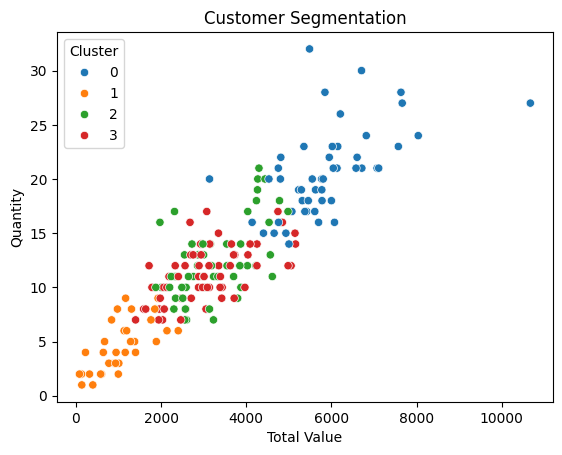

In [ ]:
# Visualize clusters
sns.scatterplot(data=customer_profile, x='TotalValue', y='Quantity', hue='Cluster', palette='tab10')
plt.title("Customer Segmentation")
plt.xlabel("Total Value")
plt.ylabel("Quantity")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Save clusster assignments
customer_profile[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)


# from google.colab import files

# # Download the Lookalike.csv file
# files.download('Customer_Clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>